In [1]:
import numpy as np
import pandas as pd
import plotly.express as px


In [2]:
df = pd.read_csv('train1.csv')
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.shape

(42000, 785)

In [4]:
import matplotlib.pyplot as plt


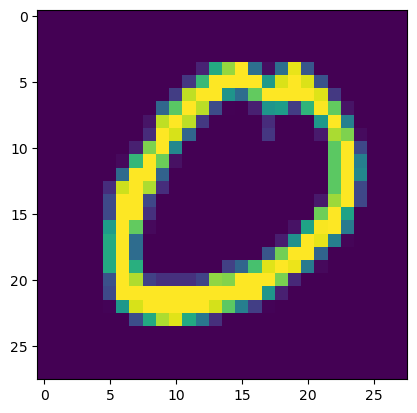

In [5]:
plt.imshow(df.iloc[13051,1:].values.reshape(28,28))

In [6]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

print(X)

       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995       0       0       0       0       0       0       0       0       0   
41996       0       0       0       0       0       0       0       0       0   
41997       0       0       0       0       0       0       0       0       0   
41998       0       0       0       0       0       0       0       0       0   
41999       0       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel77

In [7]:
print(y)

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64


In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
X_train.shape

(33600, 784)

In [10]:
X_test.shape

(8400, 784)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn = KNeighborsClassifier()

In [13]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [14]:
y_pred = knn.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [16]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [17]:
X_train1 = scalar.fit_transform(X_train)
X_test1 = scalar.transform(X_test)

In [18]:
X_train1.shape

(33600, 784)

In [19]:
X_test1.shape

(8400, 784)

In [20]:
# PCA

from sklearn.decomposition import PCA
pca = PCA(n_components = 200)

In [21]:
X_train1_trf = pca.fit_transform(X_train1)
X_test1_trf = pca.transform(X_test1)

In [22]:
X_train1_trf.shape

(33600, 200)

In [23]:
X_test1_trf.shape

(8400, 200)

In [24]:
# again we use knnClassifier for checking the accuracy score

knn = KNeighborsClassifier()

In [25]:
knn.fit(X_train1_trf,y_train)

KNeighborsClassifier()

In [26]:
y_pred = knn.predict(X_test1_trf)

In [27]:
accuracy_score(y_test,y_pred)

0.950952380952381

In [28]:
# the whole same work is doing inside a loop

for i in range(1,785):
    pca = PCA(n_components = i)
    X_train1_trf = pca.fit_transform(X_train)
    X_test1_trf = pca.fit_transform(X_test)
        
    knn = KNeighborsClassifier()
    
    knn.fit(X_train1_trf,y_train)
    
    y_pred = knn.predict(X_test1_trf)
    
    print(accuracy_score(y_test,y_pred))

0.2646428571428571
0.11607142857142858
0.1505952380952381
0.20916666666666667
0.26726190476190476
0.3560714285714286
0.3854761904761905
0.40285714285714286
0.41595238095238096
0.3880952380952381
0.35619047619047617
0.38
0.37226190476190474
0.36797619047619046
0.3510714285714286
0.32595238095238094
0.31642857142857145
0.3044047619047619
0.30047619047619045
0.3327380952380952
0.3175
0.3117857142857143
0.30916666666666665
0.30988095238095237
0.321547619047619
0.31226190476190474
0.3244047619047619
0.31357142857142856
0.3105952380952381
0.3167857142857143
0.310952380952381
0.30952380952380953
0.31297619047619046
0.3067857142857143
0.31214285714285717
0.3132142857142857
0.3163095238095238
0.31535714285714284
0.3167857142857143
0.31547619047619047
0.3163095238095238
0.316547619047619
0.31392857142857145
0.31023809523809526
0.3155952380952381
0.31476190476190474
0.319047619047619
0.3125
0.31333333333333335
0.31297619047619046
0.31285714285714283
0.3142857142857143
0.3092857142857143
0.3134523

0.2997619047619048
0.29928571428571427
0.2991666666666667
0.2991666666666667
0.2994047619047619
0.2995238095238095
0.2991666666666667
0.29928571428571427
0.29928571428571427
0.2994047619047619
0.29904761904761906
0.29928571428571427
0.2991666666666667
0.29964285714285716
0.29928571428571427
0.2991666666666667
0.2994047619047619
0.2991666666666667
0.29904761904761906
0.2988095238095238
0.2991666666666667
0.2994047619047619
0.29904761904761906
0.29892857142857143
0.2991666666666667
0.29904761904761906
0.2991666666666667
0.29892857142857143
0.29892857142857143
0.2991666666666667
0.29904761904761906
0.29892857142857143
0.29904761904761906
0.29928571428571427
0.2991666666666667
0.2991666666666667
0.2991666666666667
0.2988095238095238
0.2991666666666667
0.2986904761904762
0.2988095238095238
0.29928571428571427
0.29904761904761906
0.29904761904761906
0.2991666666666667
0.29892857142857143
0.29904761904761906
0.29892857142857143
0.29904761904761906
0.29892857142857143
0.29904761904761906
0.298

KeyboardInterrupt: 

In [ ]:
# transforming to a 2D coordinate system
pca = PCA(n_components=100)
X_train1_trf = pca.fit_transform(X_train1)
X_test1_trf = pca.transform(X_test1)

In [ ]:
X_train1_trf

In [ ]:
import plotly.express as px
y_train1_trf = y_train1.astype(str)
fig = px.scatter(x=X_train1_trf[:,0],
                 y=X_train1_trf[:,1],
                 color=y_train1_trf,
                 color_discrete_sequence=px.colors.qualitative.G10
                )
fig.show()

In [ ]:
# transforming in 3D
pca = PCA(n_components=3)
X_train1_trf = pca.fit_transform(X_train1)
X_test1_trf = pca.transform(X_test1)

In [ ]:
X_train1_trf

In [ ]:
import plotly.express as px
y_train1_trf = y_train1.astype(str)
fig = px.scatter_3d(df, x=X_train1_trf[:,0], y=X_train1_trf[:,1], z=X_train1_trf[:,2],
              color=y_train1_trf)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [ ]:
pca.explained_variance_
# Eigen values

In [ ]:
pca.components_.shape
# Eigen vectors

In [ ]:
pca.explained_variance_ratio_

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))